In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load
file_to_load = "international_airline_activity_table1_2009tocurrent_1120.csv"

# Read flights file and store into Pandas dataframe
flights_data = pd.read_csv(file_to_load)
flights_data.head()

,Month,Scheduled Operator,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year,"<< This year is based on the month selected in cell H2 in sheet ""Totals"" - it is only a calendar year if the month in sheet ""Totals"" is set to December",Unnamed: 11
0,Jan-09,Aerolineas Argentinas,Argentina,"3,021",4.3,0.6,"1,959",8.3,0.0,2009,NaN,NaN
1,Jan-09,Aerolineas Argentinas,New Zealand,627,76.3,0.0,"1,821",68.5,0.0,2009,NaN,NaN
2,Jan-09,Air Caledonie,New Caledonia,"6,658",4.9,0.6,"5,365",68.6,1.3,2009,NaN,NaN
3,Jan-09,Air Canada,Canada,"7,489",174.8,0.0,"6,424",105.2,0.0,2009,NaN,NaN
4,Jan-09,Air China,China,"12,458",201.3,18.6,"11,163",142.4,2.9,2009,NaN,NaN


In [2]:
# mail only dataframe
mail_data = flights_data[["Year", "Month", "Country to/from", "Mail In", "Mail Out"]]
mail_data.head()

,Year,Month,Country to/from,Mail In,Mail Out
0,2009,Jan-09,Argentina,0.6,0.0
1,2009,Jan-09,New Zealand,0.0,0.0
2,2009,Jan-09,New Caledonia,0.6,1.3
3,2009,Jan-09,Canada,0.0,0.0
4,2009,Jan-09,China,18.6,2.9


In [3]:
# cleaned dataframe changed Mail In/Out types as float 
clean_mail = mail_data.fillna(0)
cleanmail_to2020 = clean_mail.replace(['..'], '0')
cleanmail_to2020['Mail In'] = pd.to_numeric(cleanmail_to2020['Mail In'])
cleanmail_to2020['Mail Out'] = pd.to_numeric(cleanmail_to2020['Mail Out'])
# cleaned dataframe WITH 2020 data
cleanmail_to2020

,Year,Month,Country to/from,Mail In,Mail Out
0,2009,Jan-09,Argentina,0.6,0.0
1,2009,Jan-09,New Zealand,0.0,0.0
2,2009,Jan-09,New Caledonia,0.6,1.3
3,2009,Jan-09,Canada,0.0,0.0
4,2009,Jan-09,China,18.6,2.9
...,...,...,...,...,...
15052,2020,Nov-20,Korea,0.0,0.0
15053,2020,Nov-20,Singapore,0.0,0.0
15054,2020,Nov-20,USA,0.0,0.0
15055,2020,Nov-20,Vietnam,0.0,8.8


In [4]:
# cleaned dataframe WITHOUT 2020 data
cleanmail_to2019 = cleanmail_to2020[~clean_mail["Year"].isin(["2020"])]
cleanmail_to2019

,Year,Month,Country to/from,Mail In,Mail Out
0,2009,Jan-09,Argentina,0.6,0.0
1,2009,Jan-09,New Zealand,0.0,0.0
2,2009,Jan-09,New Caledonia,0.6,1.3
3,2009,Jan-09,Canada,0.0,0.0
4,2009,Jan-09,China,18.6,2.9
...,...,...,...,...,...
14009,2019,Nov-19,Tonga,0.0,0.0
14010,2019,Nov-19,USA,0.0,0.0
14011,2019,Nov-19,Vanuatu,0.0,0.0
14012,2019,Nov-19,Western Samoa,0.0,0.0


Text(0, 0.5, 'Total Mail')

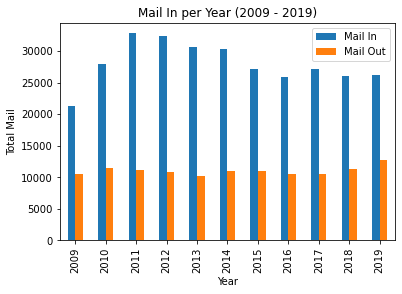

In [5]:
# 2009 - 2019 Mail In/Out data per Year
mail_in_to2019 = cleanmail_to2019.groupby(["Year"])["Mail In"].sum()
mail_out_to2019 = cleanmail_to2019.groupby(["Year"])["Mail Out"].sum()
index = cleanmail_to2020["Year"]
mail_2009to2020 = pd.DataFrame({'Mail In': mail_in_to2019,
                   'Mail Out': mail_out_to2019})
mail_2009to2020_plot = mail_2009to2020.plot.bar()
plt.title("Mail In per Year (2009 - 2019)")
plt.xlabel("Year")
plt.ylabel("Total Mail")

Text(0, 0.5, 'Total Mail')

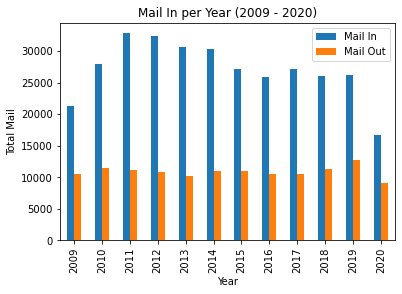

In [6]:
# 2009 - 2020 Mail In/Out data per Year
mail_in_to2020 = cleanmail_to2020.groupby(["Year"])["Mail In"].sum()
mail_out_to2020 = cleanmail_to2020.groupby(["Year"])["Mail Out"].sum()
index = cleanmail_to2020["Year"]
mail_2009to2020 = pd.DataFrame({'Mail In': mail_in_to2020,
                   'Mail Out': mail_out_to2020})
mail_2009to2020_plot = mail_2009to2020.plot.bar()
plt.title("Mail In per Year (2009 - 2020)")
plt.xlabel("Year")
plt.ylabel("Total Mail")

In [7]:
# 2009 dataframe
mail_2009 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2009"])]
# 2010 dataframe 
mail_2010 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2010"])]
# 2011 dataframe 
mail_2011 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2011"])]
# 2012 dataframe 
mail_2012 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2012"])]
# 2013 dataframe 
mail_2013 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2013"])]
# 2014 dataframe 
mail_2014 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2014"])]
# 2015 dataframe 
mail_2015 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2015"])]
# 2016 dataframe 
mail_2016 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2016"])]
# 2017 dataframe 
mail_2017 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2017"])]
# 2018 dataframe 
mail_2018 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2018"])]
# 2019 dataframe 
mail_2019 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2019"])]
# 2020 dataframe 
mail_2020 = cleanmail_to2020[cleanmail_to2020["Year"].isin(["2020"])]

Text(0, 0.5, 'Total Mail')

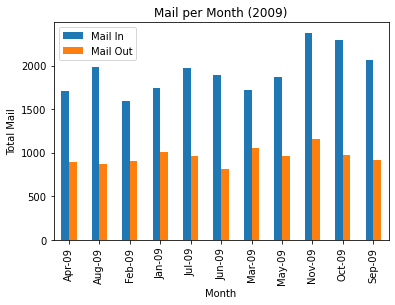

In [8]:
# 2009 Mail In/Out data per Month
mail_in_2009 = mail_2009.groupby(["Month"])["Mail In"].sum()
mail_out_2009 = mail_2009.groupby(["Month"])["Mail Out"].sum()
index = mail_2009["Month"]
mails_2009 = pd.DataFrame({'Mail In': mail_in_2009,
                   'Mail Out': mail_out_2009})
mails_2009_plot = mails_2009.plot.bar()
plt.title("Mail per Month (2009)")
plt.xlabel("Month")
plt.ylabel("Total Mail")

Text(0, 0.5, 'Total Mail')

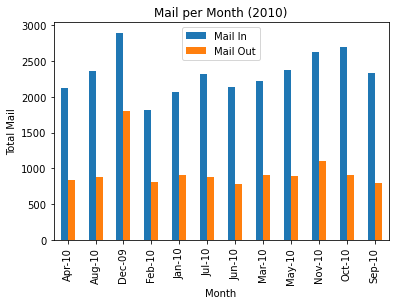

In [9]:
# 2010 Mail In/Out data per Month
mail_in_2010 = mail_2010.groupby(["Month"])["Mail In"].sum()
mail_out_2010 = mail_2010.groupby(["Month"])["Mail Out"].sum()
index = mail_2010["Month"]
mails_2010 = pd.DataFrame({'Mail In': mail_in_2010,
                   'Mail Out': mail_out_2010})
mails_2010_plot = mails_2010.plot.bar()
plt.title("Mail per Month (2010)")
plt.xlabel("Month")
plt.ylabel("Total Mail")

Text(0, 0.5, 'Total Mail')

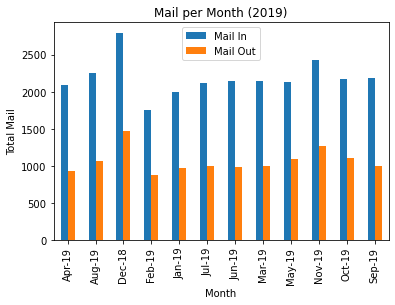

In [10]:
# 2019 Mail In/Out data
mail_in_2019 = mail_2019.groupby(["Month"])["Mail In"].sum()
mail_out_2019 = mail_2019.groupby(["Month"])["Mail Out"].sum()
index = mail_2019["Month"]
mails_2019 = pd.DataFrame({'Mail In': mail_in_2019,
                   'Mail Out': mail_out_2019})
mails_2019_plot = mails_2019.plot.bar()
plt.title("Mail per Month (2019)")
plt.xlabel("Month")
plt.ylabel("Total Mail")

In [ ]:
# Generate plots on countries